<a href="https://colab.research.google.com/github/OsyaginVictor/Predicting-the-risk-of-an-accident/blob/main/Predicting_the_risk_of_an_accident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Предсказание риска ДТП на маршруте

#### Постановка задачи
Нужно создать систему, которая могла бы оценить риск ДТП по выбранному маршруту движения. Под риском понимается вероятность ДТП с любым повреждением транспортного средства. Как только водитель забронировал автомобиль, сел за руль и выбрал маршрут, система должна оценить уровень риска. Если уровень риска высок, водитель увидит предупреждение и рекомендации по маршруту.

#### Идея решения задачи:

Создать модель предсказания ДТП (целевое значение — at_fault (виновник) в таблице parties)

Для модели выбрать тип виновника — только машина (car).

Выбрать случаи, когда ДТП привело к любым повреждениям транспортного средства, кроме типа SCRATCH (царапина).

Для моделирования ограничиться данными за 2012 год — они самые свежие.

Обязательное условие — учесть фактор возраста автомобиля.

На основе модели исследовать основные факторы ДТП.

Понять, помогут ли результаты моделирования и анализ важности факторов ответить на вопросы:

Возможно ли создать адекватную системы оценки водительского риска при выдаче авто?

Какие ещё факторы нужно учесть?

Нужно ли оборудовать автомобиль какими-либо датчиками или камерой?

Заказчик предлагает вам поработать с базой данных по происшествиям и сформировать свои идеи создания такой системы.

## Описание таблиц данных

### collisions (информация о происшествия)

case_id (идентификационный номер в базе данных);

collision_date (дата происшествия);

collision_time (время происшествия);

intersection (является ли место происшествия перекрестком):

Y — Intersection (перекрёсток);

N — Not Intersection (не перекрёсток);

_ Not stated (Не указано).

weather_1 (погода):

A — Clear (Ясно);

B — Cloudy (Облачно);

C — Raining (Дождь);

D — Snowing (Снегопад);

E — Fog (Туман);

F — Other (Другое);

G — Wind (Ветер);

collision_damage (серьезность происшествия):

Fatal TC (Не подлежит восстановлению);

Severe Damage (Серьезное повреждение);

Middle Damage (Машина в целом на ходу);

Small Damage (Отдельный элемент под замену / покраску);

Scratch (Царапина).

primary_collision_factor (основной фактор аварии):

A - Code Violation (Нарушение правил ПДД);

B - Other Improper Driving (Другое неправильное вождение);

C - Other Than Driver (Кроме водителя);

D - Unknown (Неизвестно);

E - Fell Asleep (Заснул);

_ - Not Stated (Не указано).

road_surface (состояние дороги):

A — Dry (Сухая);

B — Wet (Мокрая);

C — Snowy or Icy (Заснеженная или обледенелая);

D — Slippery (Muddy, Oily, etc.) (Скользкая, грязная, маслянистая и т. д.);

_ Not Stated (Не указано).

lightning (освещение):

A — Daylight (Дневной свет);

B — Dusk-Dawn (Сумерки-Рассвет);

C — Dark-Street Lights (Темно-Уличные фонари);

D — Dark-No Street Lights (Темно-Нет уличных фонарей);

E — Dark-Street Lights Not Functioning (Темно-Уличные фонари не работают);

_ Not Stated (Не указано).

county_city_location (номер географических районов, где произошло ДТП);

county_location (названия географических районов, где произошло ДТП);

direction (направление движения):

N — North (Север)

E — East (Восток)

S — South (Юг)

W — West (Запад)

_ — Not State (Не указано)

на перекрёстке

distance (расстояние до главной дороги в метрах);

location_type (тип дороги):

H — Highway (Шоссе);

I — Intersection (Перекрёсток);

R — Ramp (or Collector) (Рампа);

_ — Not State Highway (Не указано).

party_count (количество участников);

pcf_violation_category (категория нарушения):

01 - Driving Under the Influence of Alcohol or Drug - Вождение или езда в состоянии алкогольного или наркотического опьянения;

02 - Impeding Traffic - Препятствие движению транспорта;

03 - Unsafe Speed - Превышение скорости;

04 - Following Too Closely - Опасное сближение;

05 - Wrong Side of Road - Неправильная сторона дороги;

06 — Improper Passing - Неправильное движение;

07 — Unsafe Lane Change - Небезопасная смена полосы движения;

08 — Improper Turning - Неправильный поворот;

09 — Automobile Right of Way - Автомобильное право проезда;

10 — Pedestrian Right of Way - Пешеходное право проезда;

11 — Pedestrian Violation - Нарушение пешеходами;

12 — Traffic Signals and Signs - Дорожные сигналы и знаки;

13 — Hazardous Parking - Неправильная парковка;

14 — Lights - Освещение;

15 — Brakes - Тормоза;

16 — Other Equipment - Другое оборудование;

17 — Other Hazardous Violation - Другие нарушения;

18 — Other Than Driver (or Pedestrian) - Кроме водителя или пешехода;

19 — Speeding - Скорость;

20 — Pedestrian dui - Нарушение пешехода;

21 — Unsafe Starting or Backing - Опасный старт;

22 — Other Improper Driving - Другое неправильное вождение;

23 — Pedestrian or “Other” Under the Influence of Alcohol or Drug - Пешеход или «Другой» в состоянии алкогольного или наркотического опьянения;

24 — Fell Asleep - Заснул;

00 — Unknown - Неизвестно;

_ - Not Stated - Не указано.

type_of_collision (тип аварии):

A — Head-On (Лоб в лоб);

B — Sideswipe (Сторона);

C — Rear End (Столкновение задней частью);

D — Broadside (Боковой удар);

E — Hit Object (Удар объекта);

F — Overturned (Опрокинутый);

G — Vehicle (транспортное средство/ Пешеход);

H — Other (Другое);

_ - Not Stated (Не указано).

motor_vehicle_involved_with (дополнительные участники ДТП):

Other motor vehicle (Другой автомобиль);

Fixed object (Неподвижный объект);

Parked motor vehicle (Припаркованный автомобиль);

Pedestrian (Пешеход);

Bicycle (Велосипедист);

Non-collision (Не столкновение);

Other object (Другой объект);

Motor vehicle on other roadway (Автомобиль на другой проезжей);

Animal (Животное);

Train (Поезд).

road_condition_1 (дорожное состояние):

A — Holes, Deep Ruts (Ямы, глубокая колея);

B — Loose Material on Roadway (Сыпучий материал на проезжей части);

C — Obstruction on Roadway (Препятствие на проезжей части);

D — Construction or Repair Zone (Зона строительства или ремонта);

E — Reduced Roadway Width (Уменьшенная ширина проезжей части);

F — Flooded (Затоплено);

G — Other (Другое);

H — No Unusual Condition (Нет ничего необычного);

_ — Not Stated (Не указано).

control_device (устройство управления):

A — Functioning (Функционирует);

B — Not Functioning (Не функционирует);

C — Obscured (Затемнённый);

D — None (Нет);

_ Not Stated (Не указано).

### vehicles (описание автомобиля)

id (индекс текущей таблицы);

case_id (идентификационный номер в базе данных);

vehicle_type (тип кузова):

MINIVAN;

COUPE;

SEDAN;

HATCHBACK;

OTHER.

vehicle_transmission (тип КПП):

auto (Автоматическая).

manual (Ручная).

_ - Not Stated (Не указано)

vehicle_age (возраст автомобиля).

### parties (описание участников происшествия)

case_id (уникальный номер зарегистрированного происшествия в таблице происшествий);

party_number (номер участника происшествия) - от 1 до N: по числу участников происшествия;

party_type (тип участника происшествия):

1 - Car (Авто);

2 - Road bumper (Дорожные знаки);

3 - Building (Строения);

4 - Road signs (Отбойник);

5 - Other (Другое);

6 - Operator (Оператор);

_ - Not Stated (Не указано).

at_fault (виновность участника) - 0 или 1;

insurance_premium (сумма страховки);

party_drug_physical (состояние чуастника: физическое или с учетом принятых лекарств):

E - Under Drug Influence (Под воздействием лекарств);

F - Impairment Physical (Ухудшение состояния);

G - Impairment Unknown (Не известно);

H - Not Applicable (Не оценивался);

I - Sleepy / Fatigued (Сонный / усталый);

_ - Not Stated (Не указано).

party_sobriety (трезвость участника):

A - Had Not Been Drinking (Не пил);

B - Had Been Drinking, Under Influence (Был пьян, под влиянием);

C - Had Been Drinking, Not Under Influence (Был пьян, не под влиянием);

D - Had Been Drinking, Impairment Unknown (Был пьян, ухудшение неизвестно);

G - Impairment Unknown (Неизвестно ухудшение);

H - Not Applicable (Не оценивался);

_ - Not Stated (Не указано).

cellphone_in_use (наличие телефона в автомобиле) - 0 или

## Шаг 1. Подключитесь к базе. Загрузите таблицы sql

##### Для начала загрузим все библиотеки, которые нам могут понадобиться для решения задачи

In [ ]:
%pip install phik -q
%pip install torchmetrics -q
%pip install -q captum
!pip3 install --upgrade 'sqlalchemy<2.0'

from sqlalchemy import create_engine, text
import pandas as pd
from math import ceil
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine, text as sql_text
import seaborn as sns




import phik
from phik import report
from phik.report import plot_correlation_matrix

from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.model_selection import cross_val_score



import torch
from torch import nn
import torch.optim as optim
import torch.nn.functional as F
import torch.nn.init as init
from torchmetrics.classification import BinaryF1Score

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Подключимся к базе, после чего посмотрим на целостность наших данных, а в конце напишем промежуточный вывод по этому пункту. После, приступим к следующим шагам.

In [ ]:
db_config = {
'user': 'praktikum_student', # имя пользователя,
'pwd': 'Sdf4$2;d-d30pp', # пароль,
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения,
'db': 'data-science-vehicle-db' # название базы данных,
}

# строка подключения к базе данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db']
)

engine = create_engine(connection_string)

## Шаг 2. Проведите первичное исследование таблиц

In [ ]:
# Загружаем только первые несколько строк из таблицы "collisions"
query = '''
SELECT *
FROM collisions
LIMIT 5;
'''

collisions = pd.read_sql_query(query, con=engine)

In [ ]:
collisions.head()

,case_id,county_city_location,county_location,distance,direction,intersection,weather_1,location_type,collision_damage,party_count,primary_collision_factor,pcf_violation_category,type_of_collision,motor_vehicle_involved_with,road_surface,road_condition_1,lighting,control_device,collision_date,collision_time
0,4083072,1942,los angeles,528.0,north,0,cloudy,highway,small damage,2,vehicle code violation,unsafe lane change,sideswipe,other motor vehicle,wet,normal,daylight,none,2009-01-22,07:25:00
1,4083075,4313,santa clara,0.0,None,1,clear,None,small damage,1,vehicle code violation,improper passing,hit object,fixed object,dry,normal,dark with street lights,functioning,2009-01-03,02:26:00
2,4083073,0109,alameda,0.0,None,1,clear,None,scratch,2,vehicle code violation,improper turning,broadside,other motor vehicle,dry,normal,dark with street lights,functioning,2009-01-11,03:32:00
3,4083077,0109,alameda,0.0,None,1,clear,None,scratch,2,vehicle code violation,automobile right of way,broadside,other motor vehicle,dry,normal,daylight,functioning,2009-01-11,10:35:00
4,4083087,4313,santa clara,0.0,None,1,clear,None,scratch,2,vehicle code violation,speeding,rear end,other motor vehicle,dry,None,dark with street lights,functioning,2009-01-02,22:43:00


In [ ]:
collisions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   case_id                      5 non-null      object 
 1   county_city_location         5 non-null      object 
 2   county_location              5 non-null      object 
 3   distance                     5 non-null      float64
 4   direction                    1 non-null      object 
 5   intersection                 5 non-null      int64  
 6   weather_1                    5 non-null      object 
 7   location_type                1 non-null      object 
 8   collision_damage             5 non-null      object 
 9   party_count                  5 non-null      int64  
 10  primary_collision_factor     5 non-null      object 
 11  pcf_violation_category       5 non-null      object 
 12  type_of_collision            5 non-null      object 
 13  motor_vehicle_involved_w

In [ ]:
query = '''
SELECT *
FROM parties
LIMIT 5;
'''

parties = pd.read_sql_query(query, con=engine)

In [ ]:
parties.head()

,id,case_id,party_number,party_type,at_fault,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use
0,22,3899454,1,road signs,1,29.0,had not been drinking,None,0
1,23,3899454,2,road signs,0,7.0,had not been drinking,None,0
2,29,3899462,2,car,0,21.0,had not been drinking,None,0
3,31,3899465,2,road signs,0,24.0,had not been drinking,None,0
4,41,3899478,2,road bumper,0,NaN,not applicable,not applicable,0


In [ ]:
parties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5 non-null      int64  
 1   case_id              5 non-null      object 
 2   party_number         5 non-null      int64  
 3   party_type           5 non-null      object 
 4   at_fault             5 non-null      int64  
 5   insurance_premium    4 non-null      float64
 6   party_sobriety       5 non-null      object 
 7   party_drug_physical  1 non-null      object 
 8   cellphone_in_use     5 non-null      int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 488.0+ bytes


In [ ]:
query = '''
SELECT *
FROM vehicles;
'''

vehicles = pd.read_sql_query(query, con=engine)

In [ ]:
vehicles.head()

,id,case_id,party_number,vehicle_type,vehicle_transmission,vehicle_age
0,1175713,5305032,2,sedan,manual,3.0
1,1,3858022,1,sedan,auto,3.0
2,1175712,5305030,1,sedan,auto,3.0
3,1175717,5305033,3,sedan,auto,5.0
4,1175722,5305034,2,sedan,auto,5.0


In [ ]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021234 entries, 0 to 1021233
Data columns (total 6 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1021234 non-null  int64  
 1   case_id               1021234 non-null  object 
 2   party_number          1021234 non-null  int64  
 3   vehicle_type          1021234 non-null  object 
 4   vehicle_transmission  997575 non-null   object 
 5   vehicle_age           996652 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 46.7+ MB


##### Промежуточный вывод

У нас имеется набор данных, состоящий из трех таблиц. В соответствии с условием, каждая таблица содержит информацию о различных аспектах происшествий. Каждая таблица имеет описание столбцов, которые характеризуют данные. Общим ключом, используемым для связи таблиц, является case_id, который является уникальным идентификатором каждого происшествия. Кроме того, таблицы parties и vehicles связаны еще одним ключом - party_number, который указывает на номер участника происшествия.

По сути, таблица parties содержит информацию обо всех участниках ДТП, включая людей, автомобили и сторонние предметы. Таблица vehicles дополняет эту информацию, освещая только аспекты, связанные с автомобилями.

Общее количество записей в таблице parties составляет 2,7 миллиона, в таблице collisions - 1,4 миллиона, а в таблице vehicles - 1 миллион.

##  Шаг 3. Проведите статистический анализ факторов ДТП

###### Изучим кол-во аварий по месяцам

In [ ]:
query = '''
SELECT EXTRACT(YEAR FROM collision_date) AS year_collision,
       EXTRACT(MONTH FROM collision_date) AS month_collision,
       COUNT(case_id) AS count_collision
FROM collisions
GROUP BY year_collision, month_collision
ORDER BY year_collision, count_collision DESC
'''
collisions_count = pd.read_sql_query(query, con=engine)

In [ ]:
collisions_count.head()

,year_collision,month_collision,count_collision
0,2009.0,10.0,37835
1,2009.0,5.0,36916
2,2009.0,3.0,36648
3,2009.0,12.0,36060
4,2009.0,9.0,35555


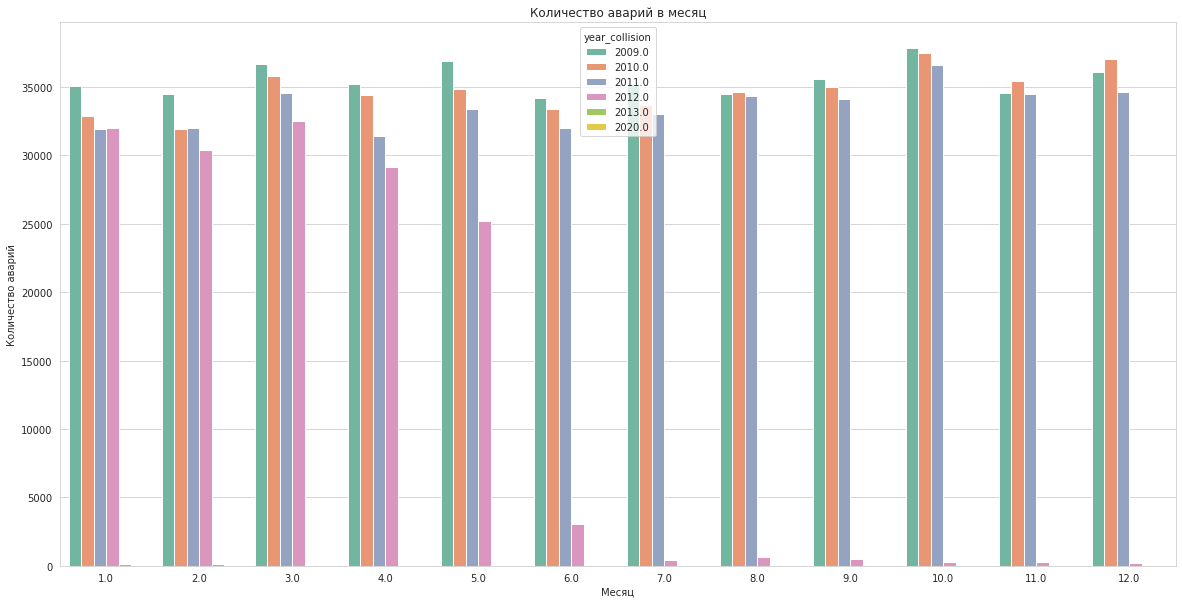

In [ ]:
# Задаем стиль графика
sns.set_style("whitegrid")

# Создаем график и указываем размеры
fig, ax = plt.subplots(figsize=(20, 10))

# Строим столбчатую диаграмму
sns.barplot(data=collisions_count, x='month_collision', y='count_collision', hue='year_collision', palette='Set2')

# Задаем заголовок и подписи осей
plt.title('Количество аварий в месяц')
plt.xlabel('Месяц')
plt.ylabel('Количество аварий')

# Отображаем график
plt.show()

Имеющиеся данные о дорожно-транспортных происшествиях охватывают период с 2009 по 2012 годы. В то время имеется значительное количество записей. Однако за 2013 и 2020 годы информация о происшествиях доступна лишь в небольшом количестве, и их можно считать нерепрезентативными для анализа. С учетом этого, можно заметить, что после июня 2012 года произошло резкое снижение числа ДТП.

Такое падение может быть обусловлено каким-то изменением в правилах и нормах, которое повлияло на уменьшение аварий, так и неполнотой данных. Возможно, в этот период были введены новые меры безопасности на дорогах или проведены реформы в системе учета ДТП, что может объяснить наблюдаемую тенденцию.

Теперь предлагается подсчитать суммарную статистику происшествий по месяцам, однако рекомендуется исключить данные за 2013 и 2020 годы, чтобы избежать искажения результатов.

Кроме того, стоит отметить, что количество дорожно-транспортных происшествий (ДТП) в марте было выше с 2009 по 2012 годы. Вероятная причина этого заключается в переменчивой погоде в этом месяце: когда температура днем поднималась выше нуля, а ночью опускалась ниже нуля, на дорогах мог образовываться гололед.

In [ ]:
query = '''
WITH t AS (SELECT DATE_TRUNC('month', collision_date)::date AS date_month,
                COUNT(*) AS cnt
           FROM collisions
           GROUP BY DATE_TRUNC('month', collision_date)::date)

SELECT EXTRACT(MONTH FROM date_month)::int AS month,
    AVG(cnt)::int
FROM t
WHERE EXTRACT(YEAR FROM date_month) BETWEEN 2009 AND 2012
GROUP BY EXTRACT(MONTH FROM date_month)
ORDER BY avg DESC;
'''

collisions_per_month = pd.read_sql_query(query, con=engine)

In [ ]:
collisions_per_month

,month,avg
0,3,34884
1,1,32975
2,5,32579
3,4,32544
4,2,32188
5,10,28059
6,12,26986
7,9,26290
8,11,26193
9,8,26022


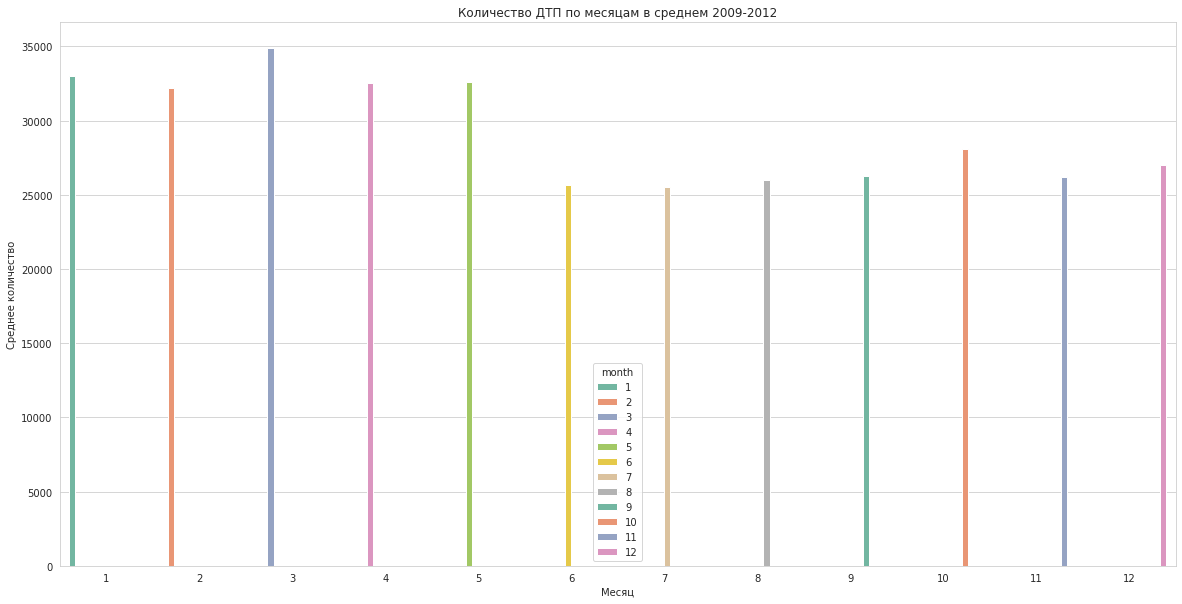

In [ ]:
# Задаем стиль графика
sns.set_style("whitegrid")

# Создаем график и указываем размеры
fig, ax = plt.subplots(figsize=(20, 10))

# Строим столбчатую диаграмму
sns.barplot(data=collisions_per_month, x='month', y='avg', hue='month', palette='Set2')

# Задаем заголовок и подписи осей
plt.title('Количество ДТП по месяцам в среднем 2009-2012')
plt.xlabel('Месяц')
plt.ylabel('Среднее количество')

# Отображаем график
plt.show()

##### Следующее на что стоит обратить внимание - это состояние дороги на момент аварии.

По изображенному графику можно сделать вывод, что в период с января по май отмечается наибольшее количество аварий.

In [ ]:
query = '''
SELECT collision_damage,
       road_surface AS road_surface,
       COUNT(collision_damage)
FROM collisions
GROUP BY collision_damage, road_surface
ORDER BY collision_damage, COUNT(collision_damage) DESC
'''
road = pd.read_sql_query(query, con=engine)
road.head(15)

,collision_damage,road_surface,count
0,fatal,dry,9823
1,fatal,wet,857
2,fatal,None,55
3,fatal,snowy,46
4,fatal,slippery,12
5,middle damage,dry,151015
6,middle damage,wet,13190
7,middle damage,None,1378
8,middle damage,snowy,762
9,middle damage,slippery,238


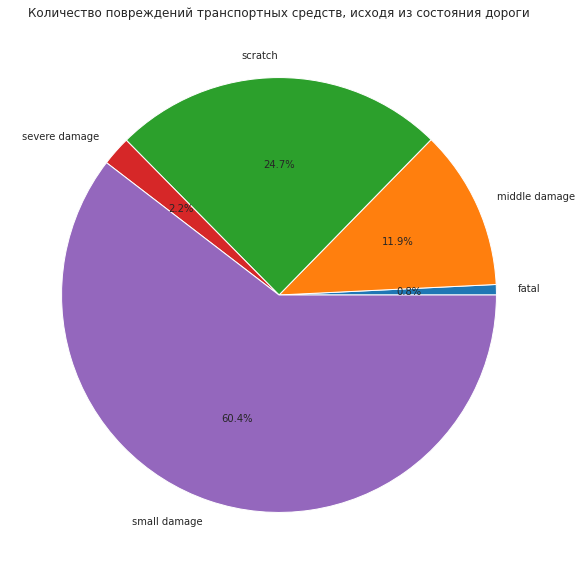

In [ ]:
plt.figure(figsize=(10, 10))
data = road.groupby('collision_damage')['count'].sum()
plt.pie(data, labels=data.index, autopct='%.1f%%')
plt.title('Количество повреждений транспортных средств, исходя из состояния дороги')
plt.show()

Согласно исследованиям, больше всего аварий происходит на сухих дорогах. Это может быть связано с тем, что многие водители чувствуют себя более уверенно и безопасно на сухом асфальте, что иногда приводит к неосторожному вождению и нарушению правил дорожного движения. Однако также стоит отметить, что много ДТП происходит и на сырых дорогах, особенно во время дождей или после них, когда поверхность покрыта влагой или сыростью.

Повреждения, которые наиболее часто возникают в результате аварий, включают небольшие дефекты и царапины.

In [ ]:
query = '''
SELECT collision_damage,
       road_condition_1 AS road_condition,
       COUNT(collision_damage)
FROM collisions
WHERE road_condition_1 != 'normal'
GROUP BY collision_damage, road_condition
ORDER BY collision_damage, COUNT(collision_damage) DESC
'''
road_collisions = pd.read_sql_query(query, con=engine)
road_collisions.head()

,collision_damage,road_condition,count
0,fatal,construction,174
1,fatal,other,54
2,fatal,obstruction,49
3,fatal,loose material,34
4,fatal,holes,23


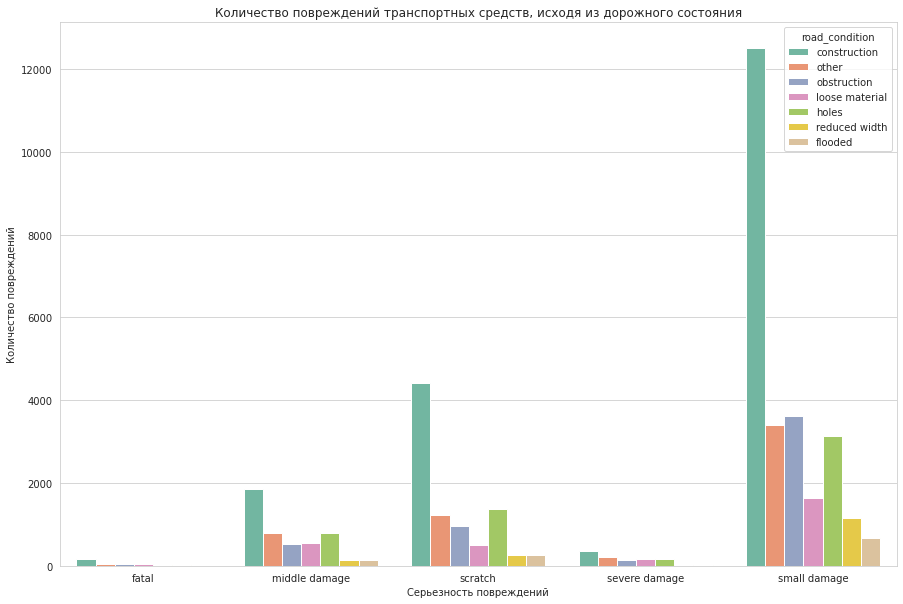

In [ ]:
sns.set_style("whitegrid")

# Создаем график и указываем размеры
fig, ax = plt.subplots(figsize=(15, 10))

# Строим столбчатую диаграмму
sns.barplot(data=road_collisions, x='collision_damage', y='count',hue='road_condition', palette='Set2')

# Задаем заголовок и подписи осей
plt.title('Количество повреждений транспортных средств, исходя из дорожного состояния')
plt.xlabel('Серьезность повреждений')
plt.ylabel('Количество повреждений')

# Отображаем график
plt.show()

Частые аварии на дорогах происходят из-за плохого состояния дорожного покрытия. Например, несовершенное строительство, присутствие препятствий на проезжей части или неровности могут стать причиной ДТП, которые в свою очередь приводят к различным повреждениям автомобилей, таким как царапины, небольшие или средние деформации.

In [ ]:
query = '''
SELECT collision_damage,
       COUNT(collision_damage)
FROM collisions
WHERE road_condition_1 = 'normal'
GROUP BY collision_damage
ORDER BY COUNT(collision_damage) DESC
'''
norm_road = pd.read_sql_query(query, con=engine)
norm_road.head()

,collision_damage,count
0,small damage,812420
1,scratch,333996
2,middle damage,160428
3,severe damage,29439
4,fatal,10372


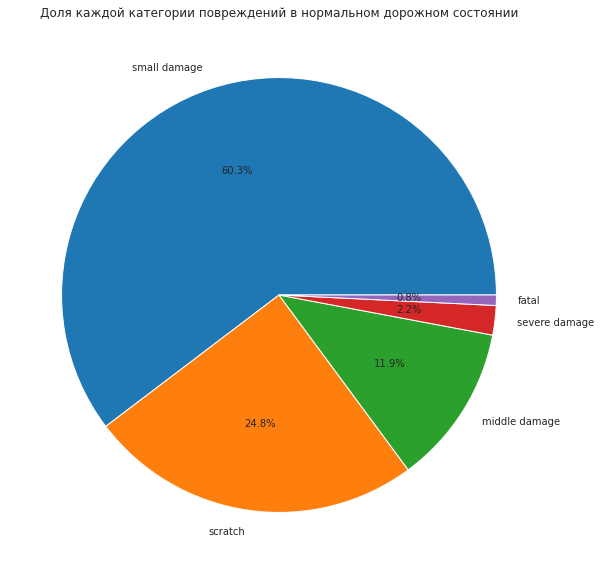

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
data = norm_road['count']
labels = norm_road['collision_damage']
plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.title('Доля каждой категории повреждений в нормальном дорожном состоянии')
plt.show()

Эта круговая диаграмма показывает, что при нормальном состоянии дорожного покрытия наиболее часто происходят дорожно-транспортные происшествия небольшой тяжести.

In [ ]:
query = '''
SELECT primary_collision_factor,
       COUNT(primary_collision_factor) count_collision_factor
FROM collisions
WHERE primary_collision_factor != 'unknown'
GROUP BY primary_collision_factor
ORDER BY count_collision_factor DESC
'''
reasons = pd.read_sql_query(query, con=engine)
reasons

,primary_collision_factor,count_collision_factor
0,vehicle code violation,1316453
1,other than driver,29780
2,other improper driving,8470
3,fell asleep,117


In [ ]:
query = '''
SELECT PCF_VIOLATION_CATEGORY,
       COUNT(PCF_VIOLATION_CATEGORY) AS count_collision_factor
FROM collisions
GROUP BY PCF_VIOLATION_CATEGORY
ORDER BY count_collision_factor DESC
'''
collisions_category = pd.read_sql_query(query, con=engine)
collisions_category

,pcf_violation_category,count_collision_factor
0,speeding,438439
1,improper turning,238987
2,automobile right of way,158291
3,dui,110476
4,unsafe lane change,93962
5,traffic signals and signs,72751
6,unsafe starting or backing,55674
7,unknown,39558
8,wrong side of road,33631
9,following too closely,30033


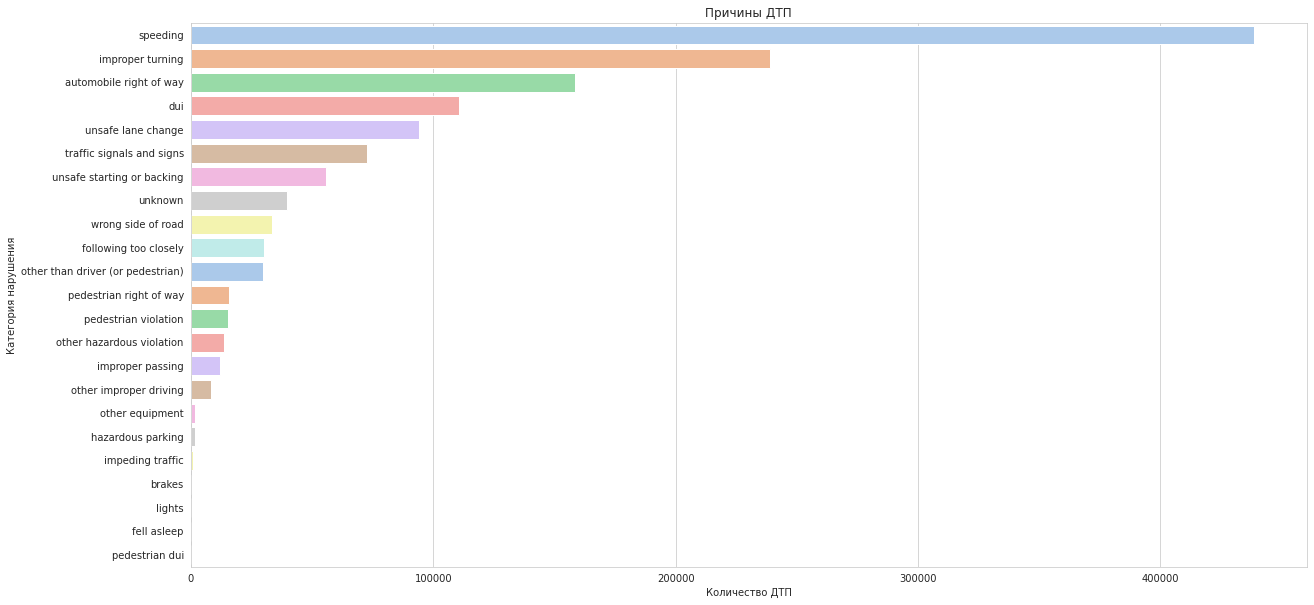

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(
    x='count_collision_factor',
    y='pcf_violation_category',
    ci=None,
    data=collisions_category,
    palette='pastel',  # Изменяем цвета столбцов на палитру "pastel"
)
plt.title('Причины ДТП')
plt.xlabel('Количество ДТП')
plt.ylabel('Категория нарушения')
plt.show()

Наиболее распространенными причинами аварий на дорогах являются следующие: превышение разрешенной скорости (это случается в 438 тысячах случаев), выполнение поворотов в местах, где такое действие запрещено (238 тысяч случаев), несоблюдение правил уступи дорогу (158 тысяч случаев) и управление автомобилем в состоянии алкогольного опьянения (110 тысяч случаев).

## Шаг 4. Создайте модель для оценки водительского риска

Следующие шаги:

- Объединение всех параметров, которые нужны будут для модели в одну таблицу
- Предобработка данных
- Разделение данных на выборки
- Подготовка данных к обучению

at_fault - указывает на главную причину ДТП, на которую делается акцент при анализе. Этот показатель помогает определить, кому принадлежит основная вина за происшествие.

cellphone_in_use - определяет, имеет ли водитель возможность использовать мобильный телефон во время вождения по громкой связи. Использование телефона за рулем может стать потенциальной причиной ДТП.

collision_damage - показывает степень серьезности повреждений, возникших в результате ДТП, исключая мелкие царапины.

collision_date - указывает на месяц и день происшествия. Сезонность, погодные условия и состояние дороги могут оказывать влияние на возникновение ДТП.

collision_time - указывает на время суток, когда произошло ДТП. Время воздействует на уровень усталости водителя и видимость на дороге.

control_device - определяет тип устройства управления автомобилем, которым водитель манипулирует. Этот фактор может оказывать значительное влияние на передвижение автомобиля.

county_city_location - обозначает географическую местоположение происшествия, которое может иметь значение при анализе. Разные районы могут иметь различия в дорожных условиях и инфраструктуре, что может влиять на вероятность возникновения ДТП.

direction - указывает на направление движения автомобиля. Например, при использовании сервиса каршеринга необходимо учитывать направление движения, так как наличие других автомобилей встречного направления может повлиять на безопасность.

intersection - указывает, произошло ли ДТП на перекрестке. Перекрестки могут быть опасными местами из-за возможного большого потока транспорта.

lightning - определяет освещение в момент происшествия. Уровень освещения может влиять на видимость водителя и, как следствие, на возможность возникновения ДТП.

location_type - указывает на тип дороги, на которой произошло ДТП. Вид дороги может оказывать влияние на безопасность движения.

road_condition_1 - показывает состояние дороги, которое может привести к ухудшению условий движения.

road_surface - определяет состояние дорожного покрытия. Наличие снега, гололеда или других факторов может повлиять на сцепление и безопасность движения.

vehicle_age - указывает на возраст автомобиля, который может влиять на его маневренность и общую надежность во время движения.

vehicle_transmission - определяет тип коробки передач автомобиля. Тип коробки передач может оказывать влияние на реакцию водителя во время движения.

vehicle_type - указывает на тип кузова автомобиля, который может влиять на видимость водителя и его способность реагировать на дорожные ситуации.

weather_1 - определяет погодные условия, которые могут влиять на видимость и сцепление с дорогой.

##### Признаки, которые могли бы привести к ДТП, но НЕ могут быть оценены до поездки:

party_drug_physical - относится к физическому состоянию участника ДТП, которое может оказывать влияние на его способности во время вождения. Однако оценить это состояние перед поездкой может быть затруднительно.

party_sobriety - определяет уровень трезвости участника ДТП, что также может повлиять на его способности во время вождения. Оценка степени трезвости перед поездкой может быть непрактичной.

primary_collision_factor - отражает основную причину ДТП, которая может различаться в каждом конкретном случае.

In [ ]:
def get_query(query):
    query_df = pd.read_sql_query(con=engine.connect(), sql=sql_text(query))
    return query_df

In [ ]:
# Необходимые для модели параметры
parameters_query = '''
WITH cars AS (SELECT *
                        FROM parties
                        WHERE party_type = 'car'
                        ),

    vehicle_info AS (SELECT c.case_id as v_case_id,
                        c.party_number,
                        c.party_type,
                        c.at_fault,
                        c.insurance_premium,
                        c.cellphone_in_use,
                        v.vehicle_type,
                        v.vehicle_transmission,
                        v.vehicle_age
                  FROM cars as c
                  JOIN vehicles as v ON c.case_id = v.case_id
                                      AND c.party_number = v.party_number
                ),

     damage AS (SELECT *, extract(hour from collision_time) as collision_hour
                FROM collisions
                WHERE collision_damage != 'scratch'
                AND  EXTRACT(YEAR FROM collision_date::date) = 2012
)


SELECT *
FROM damage as d
JOIN vehicle_info as v ON d.case_id = v.v_case_id
ORDER BY d.case_id
'''

df = get_query(parameters_query)
display(df.head())

,case_id,county_city_location,county_location,distance,direction,intersection,weather_1,location_type,collision_damage,party_count,...,collision_hour,v_case_id,party_number,party_type,at_fault,insurance_premium,cellphone_in_use,vehicle_type,vehicle_transmission,vehicle_age
0,5125160,3712,san diego,0.0,None,1.0,cloudy,None,small damage,2,...,7.0,5125160,2,car,0,42.0,0.0,sedan,auto,2.0
1,5173738,3404,sacramento,0.0,None,1.0,clear,None,small damage,2,...,12.0,5173738,2,car,0,31.0,0.0,sedan,auto,5.0
2,5269486,3400,sacramento,0.0,None,1.0,clear,None,small damage,2,...,16.0,5269486,2,car,0,21.0,0.0,sedan,auto,1.0
3,5319820,3607,san bernardino,5.0,east,0.0,clear,None,small damage,2,...,19.0,5319820,2,car,0,31.0,0.0,sedan,auto,4.0
4,5329109,3400,sacramento,0.0,None,1.0,clear,None,middle damage,2,...,13.0,5329109,2,car,1,49.0,0.0,coupe,auto,6.0


Я решил исключить некоторые характеристики: party_drug_physical, party_sobriety и primary_collision_factor. Это связано с тем, что данные параметры, хоть и играют важную роль при расследовании ДТП, невозможно определить до начала самой поездки.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56248 entries, 0 to 56247
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   case_id                      56248 non-null  object 
 1   county_city_location         56248 non-null  object 
 2   county_location              56248 non-null  object 
 3   distance                     56248 non-null  float64
 4   direction                    43230 non-null  object 
 5   intersection                 56073 non-null  float64
 6   weather_1                    56080 non-null  object 
 7   location_type                25932 non-null  object 
 8   collision_damage             56248 non-null  object 
 9   party_count                  56248 non-null  int64  
 10  primary_collision_factor     56137 non-null  object 
 11  pcf_violation_category       55482 non-null  object 
 12  type_of_collision            55940 non-null  object 
 13  motor_vehicle_in

In [ ]:
columns_to_drop = ['collision_damage', 'party_count', 'primary_collision_factor', 'type_of_collision',
                   'motor_vehicle_involved_with', 'party_number', 'party_type', 'case_id', 'v_case_id']
df = df.drop(columns=columns_to_drop)

In [ ]:
df.describe()

,distance,intersection,collision_hour,at_fault,insurance_premium,cellphone_in_use,vehicle_age
count,5.624800e+04,56073.000000,56160.000000,56248.000000,55701.000000,51777.000000,54554.000000
mean,8.594387e+02,0.221533,13.318145,0.504427,37.607170,0.020357,4.856472
std,7.240295e+03,0.415282,5.526344,0.499985,16.328721,0.141218,3.234503
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000e+00,0.000000,10.000000,0.000000,24.000000,0.000000,3.000000
50%,1.350000e+02,0.000000,14.000000,1.000000,34.000000,0.000000,4.000000
75%,5.450000e+02,0.000000,17.000000,1.000000,49.000000,0.000000,7.000000
max,1.584000e+06,1.000000,23.000000,1.000000,105.000000,1.000000,161.000000


In [ ]:
df.shape

(56248, 21)

In [ ]:
df.duplicated().sum()

19

In [ ]:
df.isna().sum()

county_city_location          0
county_location               0
distance                      0
direction                 13018
intersection                175
weather_1                   168
location_type             30316
pcf_violation_category      766
road_surface                348
road_condition_1            249
lighting                    154
control_device              215
collision_date                0
collision_time               88
collision_hour               88
at_fault                      0
insurance_premium           547
cellphone_in_use           4471
vehicle_type                  0
vehicle_transmission        859
vehicle_age                1694
dtype: int64

Исходя из полученной информации можно понять, что в данных много пропусков и есть явные дубликаты. Попробуем заполнить пропуски и удалим явные дубликаты.

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(56229, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56229 entries, 0 to 56247
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   county_city_location    56229 non-null  object 
 1   county_location         56229 non-null  object 
 2   distance                56229 non-null  float64
 3   direction               43213 non-null  object 
 4   intersection            56054 non-null  float64
 5   weather_1               56061 non-null  object 
 6   location_type           25922 non-null  object 
 7   pcf_violation_category  55464 non-null  object 
 8   road_surface            55881 non-null  object 
 9   road_condition_1        55980 non-null  object 
 10  lighting                56075 non-null  object 
 11  control_device          56014 non-null  object 
 12  collision_date          56229 non-null  object 
 13  collision_time          56141 non-null  object 
 14  collision_hour          56141 non-null

In [ ]:
df.isna().sum()

county_city_location          0
county_location               0
distance                      0
direction                 13016
intersection                175
weather_1                   168
location_type             30307
pcf_violation_category      765
road_surface                348
road_condition_1            249
lighting                    154
control_device              215
collision_date                0
collision_time               88
collision_hour               88
at_fault                      0
insurance_premium           547
cellphone_in_use           4468
vehicle_type                  0
vehicle_transmission        859
vehicle_age                1693
dtype: int64

##### Напишем функцию, которая поможет выводить графики по столбцам

In [ ]:
def graph(column):

    fig, ax = plt.subplots(figsize=(10, 6))
    fig.suptitle(column)

    ax.hist(df[column], bins=10)
    ax.set_title('Гистограмма распределения')
    ax.set_xlabel(column)
    ax.set_ylabel('Количество')

    plt.show()

Заполним пропуски в зависимости от того, является переменная категориальной или количественной.
Из выбранных параметров только vehicle_age (возраст автомобиля) является числовой переменной. Остальные переменные относятся к категориальным переменным, поскольку они представляют собой набор уникальных категорий или значений.


Начнем с пропусков в столбце cellphone_in_use

In [ ]:
df['cellphone_in_use'].value_counts()

0.0    50707
1.0     1054
Name: cellphone_in_use, dtype: int64

In [ ]:
df['cellphone_in_use'].fillna(0, inplace=True)

In [ ]:
df['cellphone_in_use'].value_counts()

0.0    55175
1.0     1054
Name: cellphone_in_use, dtype: int64

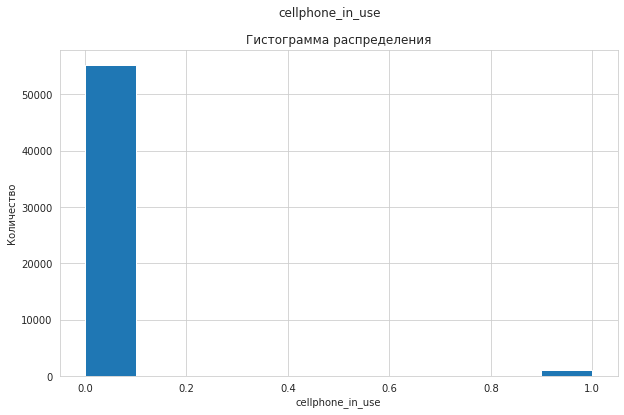

In [ ]:
graph('cellphone_in_use')

В столбце было пропущено 9912 данных. Т.к. у большей части данных проставлен 0, было принято решение проставить 0 в пропущенных данных.

В столбцах 'hour', 'control_device','intersection','lighting','road_condition','road_surface','weather' - есть незначительное кол-во пропусков для нашего датасета, поэтому удалим эти данные.

In [ ]:
df = df[~df['control_device'].isna()]
df = df[~df['intersection'].isna()]
df = df[~df['lighting'].isna()]
df = df[~df['road_surface'].isna()]
df = df[~df['weather_1'].isna()]
df = df[~df['lighting'].isna()]
df = df[~df['pcf_violation_category'].isna()]
df = df[~df['road_condition_1'].isna()]
df = df[~df['collision_hour'].isna()]
df = df[~df['collision_time'].isna()]
df = df[~df['insurance_premium'].isna()]

In [ ]:
df.isna().sum()

county_city_location          0
county_location               0
distance                      0
direction                 12234
intersection                  0
weather_1                     0
location_type             28604
pcf_violation_category        0
road_surface                  0
road_condition_1              0
lighting                      0
control_device                0
collision_date                0
collision_time                0
collision_hour                0
at_fault                      0
insurance_premium             0
cellphone_in_use              0
vehicle_type                  0
vehicle_transmission        777
vehicle_age                1479
dtype: int64

У нас осталось 4 столбца, где есть пропуски. Попробуем привести значения в них к общему.

In [ ]:
df['direction'].value_counts()

north    11673
south    11438
west      9331
east      9158
Name: direction, dtype: int64

Заполним пропуски в этом столбце строкой 'None', поскольку непонятно, к какому направлению пропущенные значения относятся.

In [ ]:
df['direction'].fillna('None', inplace=True)

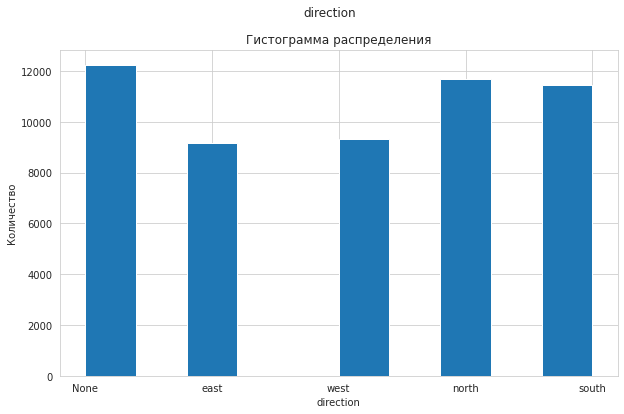

In [ ]:
graph('direction')

In [ ]:
df['location_type'].value_counts()

highway         20772
ramp             3161
intersection     1297
Name: location_type, dtype: int64

В этом столбце, так же, заполним пропуски строкой 'None', поскольку непонятно, к какому направлению пропущенные значения относятся.

In [ ]:
df['location_type'].fillna('None', inplace=True)

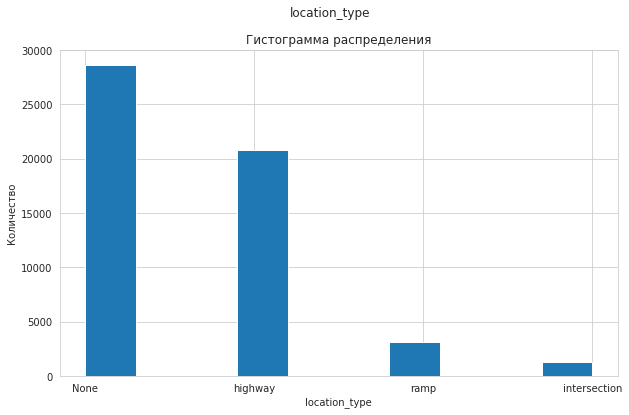

In [ ]:
graph('location_type')

In [ ]:
df['vehicle_age'].value_counts()

3.0      10573
4.0       6838
2.0       5796
5.0       5312
6.0       3793
7.0       3701
8.0       3381
0.0       2967
9.0       2674
1.0       2438
10.0      1865
11.0      1328
12.0       846
13.0       526
14.0       268
15.0        37
16.0         6
17.0         3
161.0        2
19.0         1
Name: vehicle_age, dtype: int64

В этом столбце можно спокойно заполнить пропуски медианным значением.
Так же, есть выбросы - 4 машины, которым 161 год, эти данные мы удалим.

In [ ]:
df['vehicle_age'].fillna(df['vehicle_age'].median(), inplace=True)

In [ ]:
df['vehicle_transmission'].value_counts()

manual    25291
auto      21713
Name: vehicle_transmission, dtype: int64

In [ ]:
df['vehicle_age'].value_counts()

3.0    10573
4.0     6838
2.0     5796
5.0     5312
6.0     3793
7.0     3701
8.0     3381
0.0     2967
9.0     2674
1.0     2438
Name: vehicle_age, dtype: int64

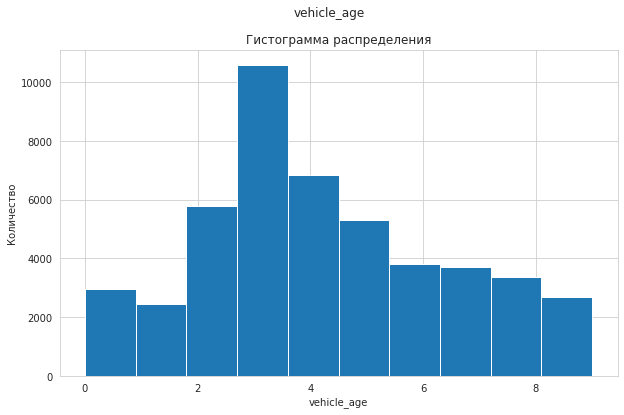

In [ ]:
graph('vehicle_age')

В этом столбце, так же, заполним пропуски строкой 'None', поскольку непонятно, к какому направлению пропущенные значения относятся.

In [ ]:
df['vehicle_transmission'].fillna('None', inplace=True)

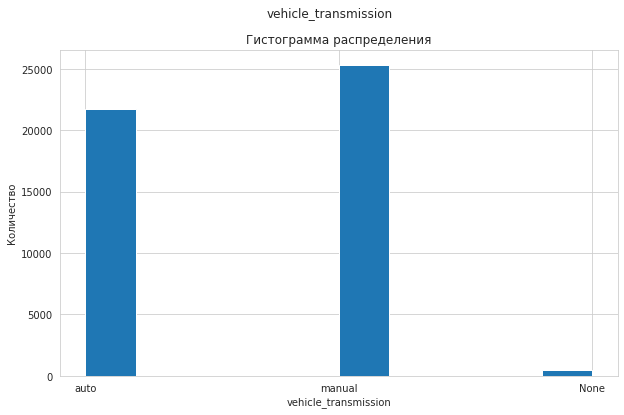

In [ ]:
graph('vehicle_transmission')

In [ ]:
 df.isna().sum()

county_city_location      0
county_location           0
distance                  0
direction                 0
intersection              0
weather_1                 0
location_type             0
pcf_violation_category    0
road_surface              0
road_condition_1          0
lighting                  0
control_device            0
collision_date            0
collision_time            0
collision_hour            0
at_fault                  0
insurance_premium         0
cellphone_in_use          0
vehicle_type              0
vehicle_transmission      0
vehicle_age               0
dtype: int64

In [ ]:
df.shape

(47473, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47473 entries, 0 to 56247
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   county_city_location    47473 non-null  object 
 1   county_location         47473 non-null  object 
 2   distance                47473 non-null  float64
 3   direction               47473 non-null  object 
 4   intersection            47473 non-null  float64
 5   weather_1               47473 non-null  object 
 6   location_type           47473 non-null  object 
 7   pcf_violation_category  47473 non-null  object 
 8   road_surface            47473 non-null  object 
 9   road_condition_1        47473 non-null  object 
 10  lighting                47473 non-null  object 
 11  control_device          47473 non-null  object 
 12  collision_date          47473 non-null  object 
 13  collision_time          47473 non-null  object 
 14  collision_hour          47473 non-null

In [ ]:
df['vehicle_age'].astype('int')

0        2
1        5
2        1
3        4
4        6
        ..
56242    6
56243    0
56244    3
56246    3
56247    7
Name: vehicle_age, Length: 47473, dtype: int64

##### Рассмотрим еще несколько графиков

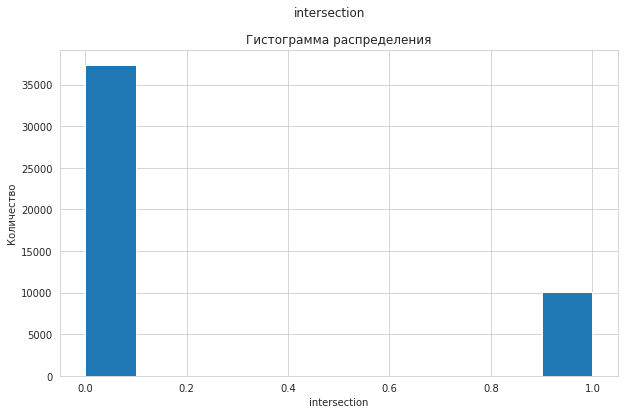

In [ ]:
graph('intersection')

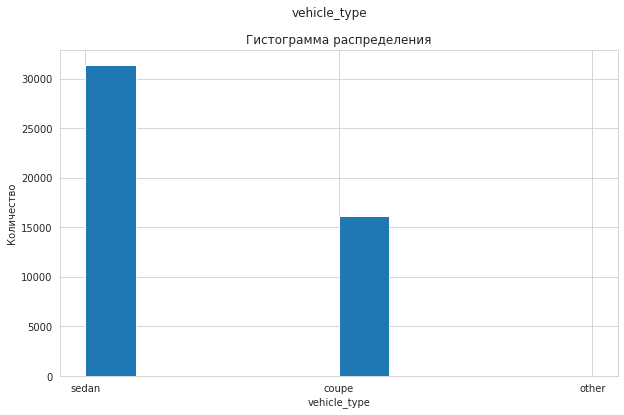

In [ ]:
graph('vehicle_type')

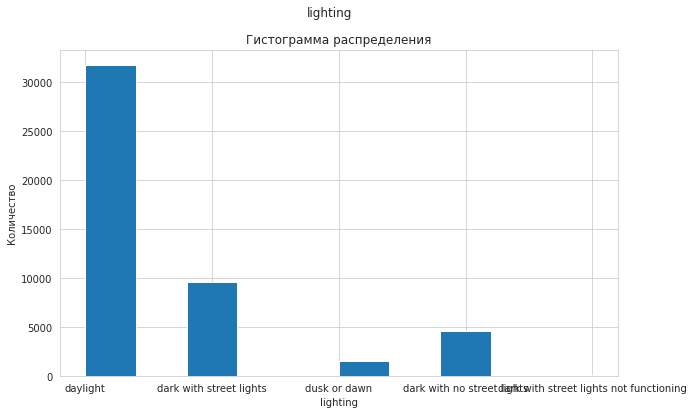

In [ ]:
graph('lighting')

В результате выполнения нашей работы, мы осуществили следующие действия:

Мы объединили все необходимые параметры для модели в одну таблицу.
Мы подробно изучили данные и обнаружили, что в них имеется много пропусков.
Для улучшения обучения моделей мы удалили небольшой процент данных, который не оказывает существенного влияния на общую картину.
К сожалению, в столбце "location_type" было много пропусков, хотя этот фактор является одним из основных.
Далее мы сосредоточимся на подготовке данных для обучения моделей.

### Подготовка данных

In [ ]:
# отключим предупреждение, которое Pandas выводит при обнаружении цепочки присваиваний.
pd.options.mode.chained_assignment = None

categorical_cols = ['county_city_location', 'county_location','direction','intersection','weather_1','location_type',
                    'pcf_violation_category','road_surface','road_condition_1','lighting','control_device','collision_date',
                    'collision_time','collision_hour','cellphone_in_use','vehicle_type','vehicle_transmission']
numeric_col = ['vehicle_age','distance','insurance_premium']

# Выделим таргет
X = df.drop('at_fault', axis=1)
y = df['at_fault']

# Разобьем данные на трнеировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.25
)

# Выполним порядковое кодирование
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
encoder.fit(X_train[categorical_cols])
X_train[categorical_cols] = encoder.transform(X_train[categorical_cols])
X_test[categorical_cols] = encoder.transform(X_test[categorical_cols])

# Масштабирование признаков
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

В рамках нашей задачи необходимо осуществить следующее: минимизировать риск попадания в ДТП на маршруте движения. У нас имеется задача бинарной классификации, где значения целевого показателя - это "Виновен" и "Не виновен". Необходимо минимизировать ложноотрицательные значения с целью максимального снижения возможного риска, но также и минимизировать ложноположительные значения, чтобы была возможность быстро добраться на пункта назначения. С этим поможет справиться F1-мера. F1-мера является полезной метрикой, когда вам нужно сбалансировать Precision и Recall. Она вычисляется как двукратное произведение Precision и Recall, деленное на их сумму. Также для определения умения предсказывания и качества модели будем использовать AUC-ROC, сравнивая с рандомной моделью.Метрика AUC-ROC (Area Under the Receiver Operating Characteristic Curve) широко используется для оценки качества бинарного классификатора. Она измеряет способность классификатора разделять положительные и отрицательные примеры, учитывая все возможные пороговые значения.
Напиши другими словами

В данной бизнес-задаче мы ставим перед собой цель минимизировать риск попадания в ДТП при движении по маршруту. Для этого мы используем задачу бинарной классификации, где целевые значения могут быть "Виновен" или "Не виновен". Наша главная задача - снизить количество ложноотрицательных предсказаний, чтобы снизить реальный риск, однако мы также стремимся минимизировать ложноположительные предсказания, чтобы иметь возможность быстро достичь конечного пункта маршрута.

Для достижения этой цели мы используем F1-меру, которая является полезной метрикой для балансировки между Precision и Recall. F1-мера вычисляется путем умножения Precision и Recall в два раза и деления на их сумму. Эта метрика позволяет нам оценить способность модели предсказывать и сбалансировать важность точности и полноты предсказаний.

Для оценки качества классификатора мы также используем AUC-ROC, которая измеряет способность модели разделять положительные и отрицательные примеры, учитывая все возможные пороговые значения. Она широко используется для оценки бинарных классификаторов и позволяет сравнить производительность модели с произвольной моделью.

In [ ]:
scoring = ['f1', 'roc_auc']

Нужно создать несколько моделей машинного обучения для решения задачи оценки риска попадания в ДТП на определенном маршруте. Для этого мы рассматриваем несколько ML-моделей: RandomForestClassifier, LGBMClassifier и нейронную сеть.

RandomForestClassifier - это модель, основанная на ансамбле деревьев решений. Она строит несколько деревьев, каждое из которых делает предсказания, и затем комбинирует эти предсказания для получения окончательного результата. RandomForestClassifier обладает хорошей способностью к обобщению данных и устойчивостью к переобучению.

LGBMClassifier - это модель градиентного бустинга на основе деревьев решений. Она работает похожим образом, как и RandomForestClassifier, но с использованием более эффективного алгоритма градиентного бустинга. LGBMClassifier обладает высокой скоростью работы и хорошей точностью.

Нейронная сеть - это модель, которая имитирует работу человеческого мозга. Она состоит из нейронов, соединенных между собой, и обладает способностью обучаться на больших объемах данных. Нейронная сеть обеспечивает гибкость и способность к выявлению сложных связей в данных, что может быть полезно для нашей задачи оценки риска.

Для каждой модели мы также планируем осуществить подбор гиперпараметров, чтобы достичь наилучшей производительности. После этого мы проведем тестирование моделей, чтобы оценить их качество и выбрать наиболее подходящую модель для решения нашей задачи.

## Шаг 5. Поиск наилучшей модели

In [ ]:
%%time

forest = RandomForestClassifier(random_state=42)

# Гиперпараметры для перебора
param_grid = {
    'max_depth': range(10, 21, 2),
    'n_estimators': range(150, 351, 50)
}

# Перебор гиперпараметров.
#Так же, установим параметр refit='f1' - это означает, что лучшая модель будет выбрана на основе значения метрики F1.
grid = GridSearchCV(forest, param_grid, scoring=scoring, refit='f1')
grid.fit(X_train, y_train)

# Получение значения гиперпараметров с лучшими метриками
metrics_columns = [f'mean_test_{x}' for x in scoring]
final_metrics = pd.DataFrame(grid.cv_results_)[metrics_columns].iloc[grid.best_index_]

print(grid.best_estimator_)
display(final_metrics)


RandomForestClassifier(max_depth=10, n_estimators=350, random_state=42)


mean_test_f1         0.654889
mean_test_roc_auc    0.732018
Name: 4, dtype: float64

CPU times: user 22min 1s, sys: 7 s, total: 22min 8s
Wall time: 22min 9s


In [ ]:
forest = RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)
forest.fit(X_train, y_train)
forest_preds = forest.predict(X_test)
forest_f1 = round(f1_score(y_test, forest_preds), 3)
forest_auc_roc = round(roc_auc_score(y_test, forest_preds), 3)

In [ ]:
%%time

lgbm = LGBMClassifier(random_state=42)

# Гиперпараметры для перебора
params_lgbm = {
    'num_leaves': range(31, 41, 3),
    'n_estimators': range(100, 201, 50),
}

# Перебор гиперпараметров
random_grid = RandomizedSearchCV(lgbm, params_lgbm, scoring=scoring, refit='f1')
random_grid.fit(X_train, y_train)

# Получение значения гиперпараметров с лучшими метриками
metrics_columns = [f'mean_test_{x}' for x in scoring]
final_metrics = pd.DataFrame(random_grid.cv_results_)[metrics_columns].iloc[random_grid.best_index_]

print(random_grid.best_estimator_)
display(final_metrics)

LGBMClassifier(random_state=42)


mean_test_f1         0.664966
mean_test_roc_auc    0.747580
Name: 6, dtype: float64

CPU times: user 4min 31s, sys: 2.82 s, total: 4min 33s
Wall time: 4min 38s


In [ ]:
lgbm = LGBMClassifier(n_estimators=150, random_state=42)
lgbm.fit(X_train, y_train)
lgbm_preds = lgbm.predict(X_test)
lgbm_f1 = round(f1_score(y_test, lgbm_preds), 3)
lgbm_auc_roc = round(roc_auc_score(y_test, lgbm_preds), 3)

In [ ]:
# Установка random seed

torch.manual_seed(42)
np.random.seed(42)

X_train_torch = torch.FloatTensor(X_train)
X_test_torch = torch.FloatTensor(X_test)
y_train_torch = torch.FloatTensor(y_train.values)
y_test_torch = torch.FloatTensor(y_test.values)

in_neurons = X_train.shape[1]
hidden_neurons_1 = 16
hidden_neurons_2 = 8
out_neurons = 1

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(in_neurons, hidden_neurons_1)
        self.bn1 = nn.BatchNorm1d(hidden_neurons_1)
        self.fc2 = nn.Linear(hidden_neurons_1, hidden_neurons_2)
        self.bn2 = nn.BatchNorm1d(hidden_neurons_2)
        self.fc3 = nn.Linear(hidden_neurons_2, out_neurons)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = F.sigmoid(x)
        x = self.fc3(x)
        x = F.sigmoid(x)
        return x

net = Net()
optimizer = optim.Adam(net.parameters(), lr=1e-3)
loss = nn.BCELoss()


In [ ]:
def init_weights(m):
    if isinstance(m, nn.Linear):
        init.xavier_uniform_(m.weight)
        init.constant_(m.bias, 0.0)

net.apply(init_weights)

Net(
  (fc1): Linear(in_features=20, out_features=16, bias=True)
  (bn1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=16, out_features=8, bias=True)
  (bn2): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=8, out_features=1, bias=True)
)

In [ ]:
%%time

num_epochs = 12
batch_size = 128
num_batches = ceil(len(X_train_torch) / batch_size)

for epoch in range(num_epochs):
    order = np.random.permutation(len(X_train_torch))
    for batch_idx in range(num_batches):
        start_idx = batch_idx * batch_size
        optimizer.zero_grad()
        batch_indexes = order[start_idx:start_idx + batch_size]
        X_batch = X_train_torch[batch_indexes]
        y_batch = y_train_torch[batch_indexes]
        preds = net(X_batch).flatten()
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        optimizer.step()

    if epoch % 1 == 0:
        net.eval()
        net_preds = net(X_test_torch).flatten()
        net_f1 = round(f1_score(y_test, net_preds.detach().numpy().round()), 3)
        net_auc_roc = round(roc_auc_score(y_test, net_preds.detach().numpy().round()), 3)
        print('Epoch:', epoch)
        print('F1-мера =', net_f1)
        print('AUC-ROC =', net_auc_roc, '\n')

/opt/conda/lib/python3.9/site-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 0
F1-мера = 0.625
AUC-ROC = 0.636 



/opt/conda/lib/python3.9/site-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 1
F1-мера = 0.628
AUC-ROC = 0.638 



/opt/conda/lib/python3.9/site-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 2
F1-мера = 0.633
AUC-ROC = 0.637 



/opt/conda/lib/python3.9/site-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 3
F1-мера = 0.634
AUC-ROC = 0.638 



/opt/conda/lib/python3.9/site-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 4
F1-мера = 0.61
AUC-ROC = 0.639 



/opt/conda/lib/python3.9/site-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 5
F1-мера = 0.614
AUC-ROC = 0.642 



/opt/conda/lib/python3.9/site-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 6
F1-мера = 0.623
AUC-ROC = 0.644 



/opt/conda/lib/python3.9/site-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 7
F1-мера = 0.607
AUC-ROC = 0.647 



/opt/conda/lib/python3.9/site-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 8
F1-мера = 0.631
AUC-ROC = 0.651 



/opt/conda/lib/python3.9/site-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 9
F1-мера = 0.628
AUC-ROC = 0.65 



/opt/conda/lib/python3.9/site-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 10
F1-мера = 0.624
AUC-ROC = 0.65 



/opt/conda/lib/python3.9/site-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 11
F1-мера = 0.634
AUC-ROC = 0.652 

CPU times: user 21.7 s, sys: 214 ms, total: 21.9 s
Wall time: 22.3 s


In [ ]:
models_metrics = pd.DataFrame(
    data=[[forest_f1, lgbm_f1, net_f1],
          [forest_auc_roc, lgbm_auc_roc, net_auc_roc]],
    columns=['RandomForestClassifier', 'LGBMClassifier', 'NeuralNet'],
    index=['F1', 'AUC-ROC']
)

display(models_metrics)

,RandomForestClassifier,LGBMClassifier,NeuralNet
F1,0.663,0.667,0.634
AUC-ROC,0.681,0.680,0.652


Исходя из предоставленных данных, можно сделать следующие выводы:

RandomForestClassifier показал значительное значение F1-меры (0.663), что указывает на высокую способность модели правильно классифицировать оба класса. Значение AUC-ROC для этой модели (0.681) также является довольно высоким, указывая на хорошую способность модели предсказывать вероятности.

LGBMClassifier имеет незначительно более высокие значения F1-меры (0.667) по сравнению с RandomForestClassifier, указывая на более сбалансированную модель для обоих классов. Значение AUC-ROC для этой модели (0.680) также довольно высокое, подтверждая хорошую способность модели в вероятностной оценке предсказаний.

NeuralNet показывает F1-меру немного лучше, чем остальные модели (0.634). Значение AUC-ROC для этой модели (0.652) также является довольно высоким, указывая на хорошую способность модели предсказывать вероятности.

В целом, все три модели показывают высокую производительность и хорошие значения метрик F1 и AUC-ROC. Но NeuralNet вырывается вперед.

## Шаг 6. Проверим лучшую модель в работе

Для начала, давайте рассмотрим матрицу ошибок для лучших моделей. Матрица ошибок – это таблица, представляющая собой сопоставление предсказанных и фактических классов в задаче классификации.

После этого мы можем определить важность параметров, то есть как каждый параметр влияет на предсказания модели.


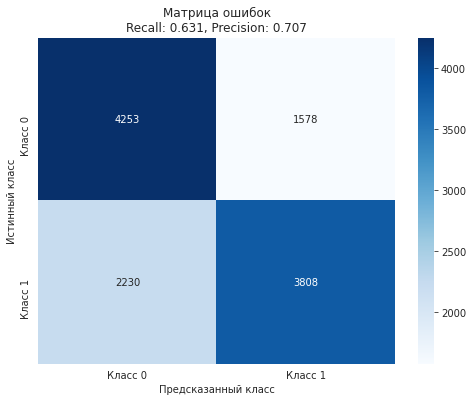

In [ ]:

# Создаем матрицу ошибок
cm = confusion_matrix(y_test, lgbm_preds)

# Вычисляем значения метрик Recall и Precision
precision = precision_score(y_test, lgbm_preds)
recall = recall_score(y_test, lgbm_preds)

# Создаем список меток классов
class_names = ['Класс 0', 'Класс 1']

# Создаем фигуру и оси графика
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Добавляем значения метрик Recall и Precision в заголовок
plt.title(f'Матрица ошибок\nRecall: {recall:.3f}, Precision: {precision:.3f}')

# Добавляем названия осей
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')

# Отображаем график
plt.show()

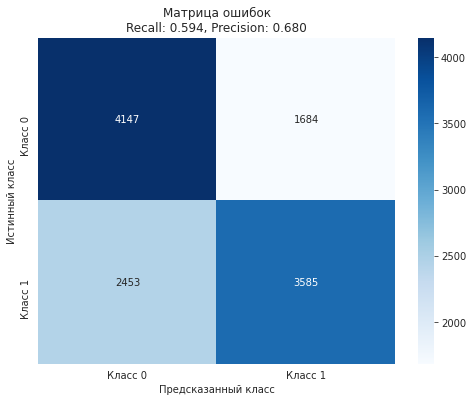

In [ ]:
# Создаем матрицу ошибок
cm_net = confusion_matrix(y_test, net_preds.detach().numpy().round())

# Вычисляем значения метрик Recall и Precision
precision_net = precision_score(y_test, net_preds.detach().numpy().round())
recall_net = recall_score(y_test, net_preds.detach().numpy().round())

# Создаем список с названиями классов
class_names = ["Класс 0", "Класс 1"]

# Создаем фигуру и оси графика
plt.figure(figsize=(8, 6))
sns.heatmap(cm_net, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Добавляем значения метрик Recall и Precision в заголовок
plt.title(f'Матрица ошибок\nRecall: {recall_net:.3f}, Precision: {precision_net:.3f}')

# Добавляем названия осей
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')

# Отображаем график
plt.show()

По анализу матриц ошибок двух моделей - LGBMClassifier и Нейронной сети - можно сделать следующие выводы. Во-первых, обе модели показывают результаты, которые лучше случайного угадывания и могут быть полезны при прогнозировании риска попадания в ДТП.

Второе наблюдение состоит в том, что у модели LGBMClassifier значение метрики Precision (точность) выше, чем у Нейронной сети. Это означает, что модель LGBMClassifier наиболее точно идентифицирует истинно положительные случаи.

Третье наблюдение - значения метрики Recall (полнота) практически одинаковы для обеих моделей. Recall измеряет способность модели обнаружить все положительные случаи.

Таким образом, при сравнении этих двух моделей можно сказать, что нейросеть выигрывает в показателях, но и LGBMClassifier не сильно отстает. Выбор между моделями должен быть основан на приоритетах и требованиях к конкретной задаче, будь то важность точности или полноты прогнозов.

### Важность факторов

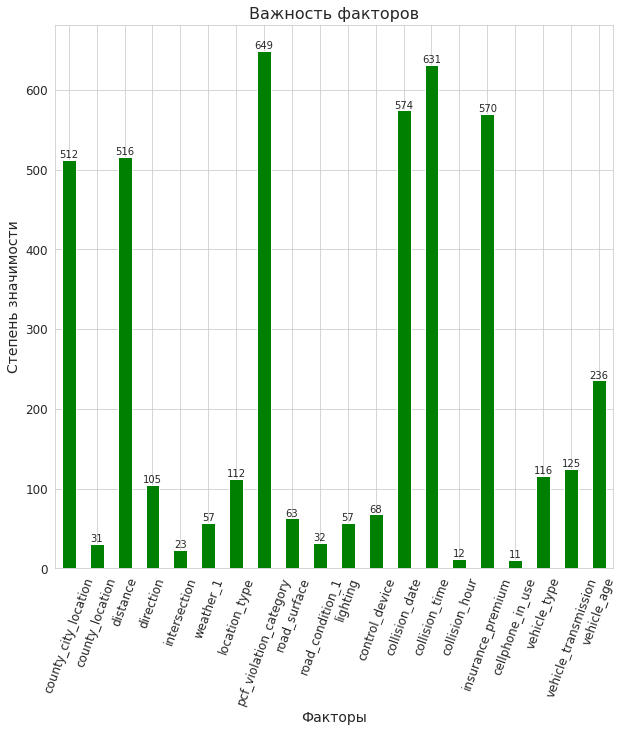

In [ ]:
importances = lgbm.feature_importances_
forest_importances = pd.Series(importances, X.columns.values)

plt.figure(figsize=(10, 10))

ax = forest_importances.plot(kind='bar', grid=True, color='g')  # Изменили цвет столбцов на зеленый

plt.title('Важность факторов', fontsize=16)
plt.xticks(fontsize=12, rotation=70)  # Изменили угол наклона меток по оси X для лучшей читаемости
plt.xlabel('Факторы', fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel('Степень значимости', fontsize=14)

# Добавляем значения важности над каждым столбцом
for i, v in enumerate(importances):
    ax.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom', fontsize=10)

plt.show()

Для рассмотрения графика зависимости самого важного фактора, влияющее на предсказание модели - location_type - воспользуемся корреляцией phik, которая помогает определить коэффициент корреляции с категориальными параметрами.

interval columns not set, guessing: ['at_fault']


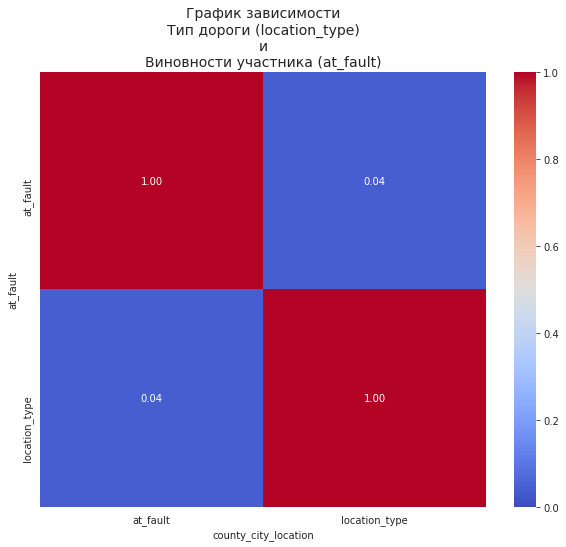

In [ ]:
phik_overview = df[['at_fault', 'location_type']].phik_matrix()
phik_overview_rounded = phik_overview.round(2)

# Изменение размера графика
plt.figure(figsize=(10, 8))

# Создание цветовой шкалы
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Отрисовка тепловой карты
sns.heatmap(
    phik_overview_rounded.values,
    cmap=cmap,
    vmin=0,
    vmax=1,
    annot=True,
    fmt=".2f",
    xticklabels=phik_overview_rounded.columns,
    yticklabels=phik_overview_rounded.index
)

# Добавление заголовка и меток осей
plt.title('График зависимости\nТип дороги (location_type)\nи\nВиновности участника (at_fault)',
          fontsize=14)
plt.xlabel('county_city_location')
plt.ylabel('at_fault')

plt.show()

На основании представленного графика можно сделать вывод о низкой значимости фактора "Тип дороги", где произошло ДТП" для определения виновности участника в ДТП,коэффициент корреляции phik довольно низок и составляет всего 0.04

## Шаг 7. общий вывод по модели



На основании нашего исследования мы пришли к выводу, что для решения данной задачи хорошо подходит модель нейросети. Мы достигли неплохих результатов в метриках, насколько я могу судить. Однако я уверен, что метрики можно улучшить, если будет меньше пропусков в данных.

Предложение: Для учета данного фактора при посадке водителя можно оборудовать машину GPS-локатором и GPS-навигатором, которые будут отслеживать местоположение автомобиля, маршрут движения, а также предлагать возможные объездные пути для того, чтобы снизить риск попадания в аварию. Более того, маршрут движения должен быть отображен заранее, чтобы можно было предложить рекомендации по движению еще до его начала, а не только во время пути, когда тоже возможно повышения риска попадания в ДТП.